# Medical Insurance Cost Prediction Project

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
df.shape

(1338, 7)

In [10]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [11]:
df.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500


In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Checking Null values

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

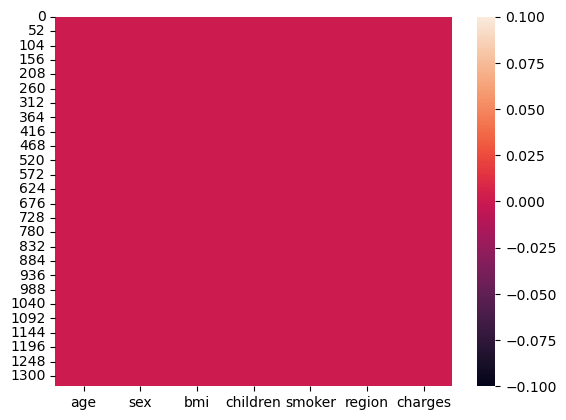

In [16]:
sns.heatmap(df.isnull())

As, we can see that no null values are found

In [17]:
df["sex"].value_counts() 

male      676
female    662
Name: sex, dtype: int64

In [18]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [20]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [21]:
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


# To check for duplicate datas..

In [22]:
df.duplicated().sum()

1

In [23]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

In [24]:
df_n=df[df['charges'] == 1639.56310]
df_n

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Here, we can see that 1 row repeated twice, so we will remove the duplicate data. 

In [25]:
#Removing the duplicate row
df.drop_duplicates(subset= "charges", keep='first', inplace=True)

In [26]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
18   female  20.790  0         no      southeast  1607.51010     1
48   female  27.360  1         no      northeast  9447.38240     1
             25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [28]:
df_n=df[df['charges'] == 1639.56310]
df_n

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [29]:
df.shape

(1337, 7)

As, we can see that duplicate row is deleted.

In [30]:
#statisdical summary of numerical columns
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


From the above, we can see that

1) The dataset looks perfect because it did not have any negative/invalid datas
2) The counts are same, so no missing values
3) The mean is higher than median(50%) in all columns, so Right side skweness.
4) There is also huge difference between 75% and max in some columns, so outliers are present. 

# Data Visualisation

In [31]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

male      675
female    662
Name: sex, dtype: int64


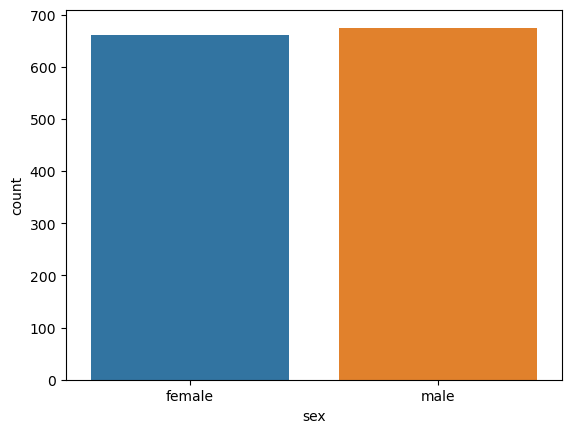

In [32]:
sns.countplot(x='sex', data =df)
print(df['sex'].value_counts())

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


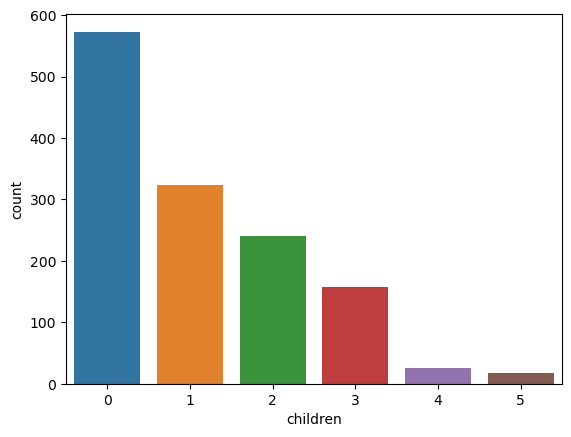

In [33]:
sns.countplot(x='children', data =df)
print(df['children'].value_counts())

no     1063
yes     274
Name: smoker, dtype: int64


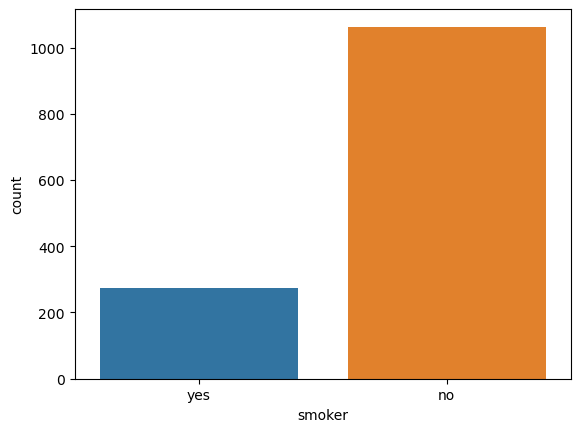

In [34]:
sns.countplot(x='smoker', data =df)
print(df['smoker'].value_counts())

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


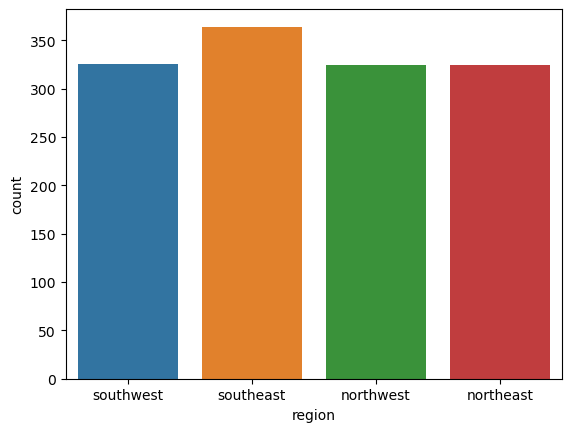

In [35]:
sns.countplot(x='region', data =df)
print(df['region'].value_counts())

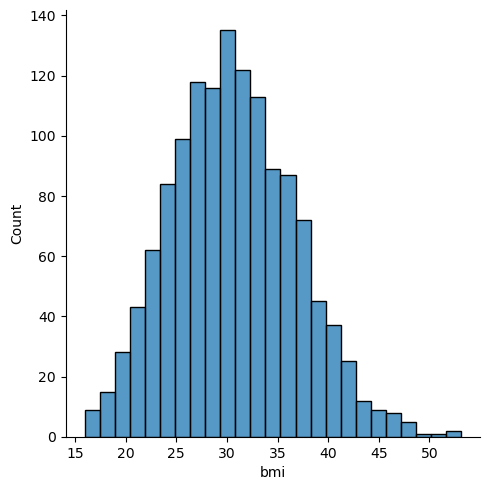

In [36]:
sns.displot(df['bmi'])

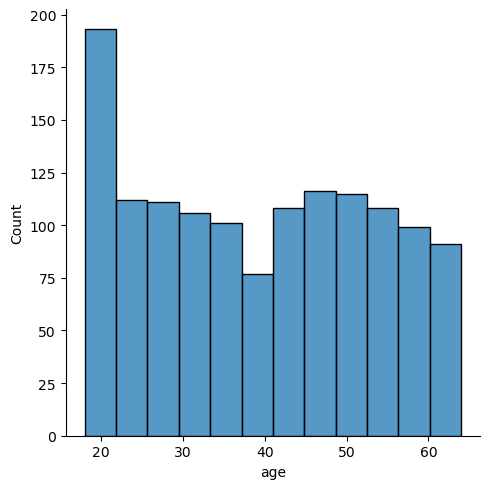

In [37]:
sns.displot(df['age'])

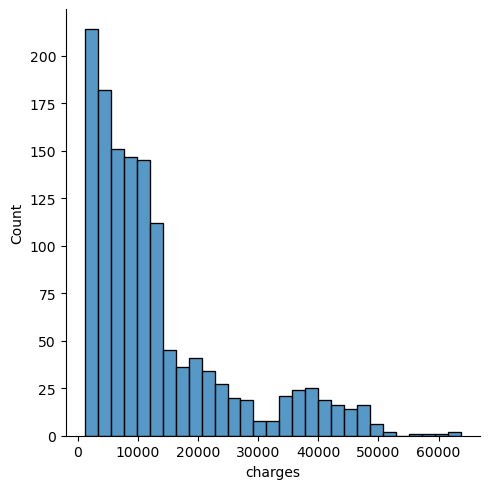

In [38]:
sns.displot(df['charges'])

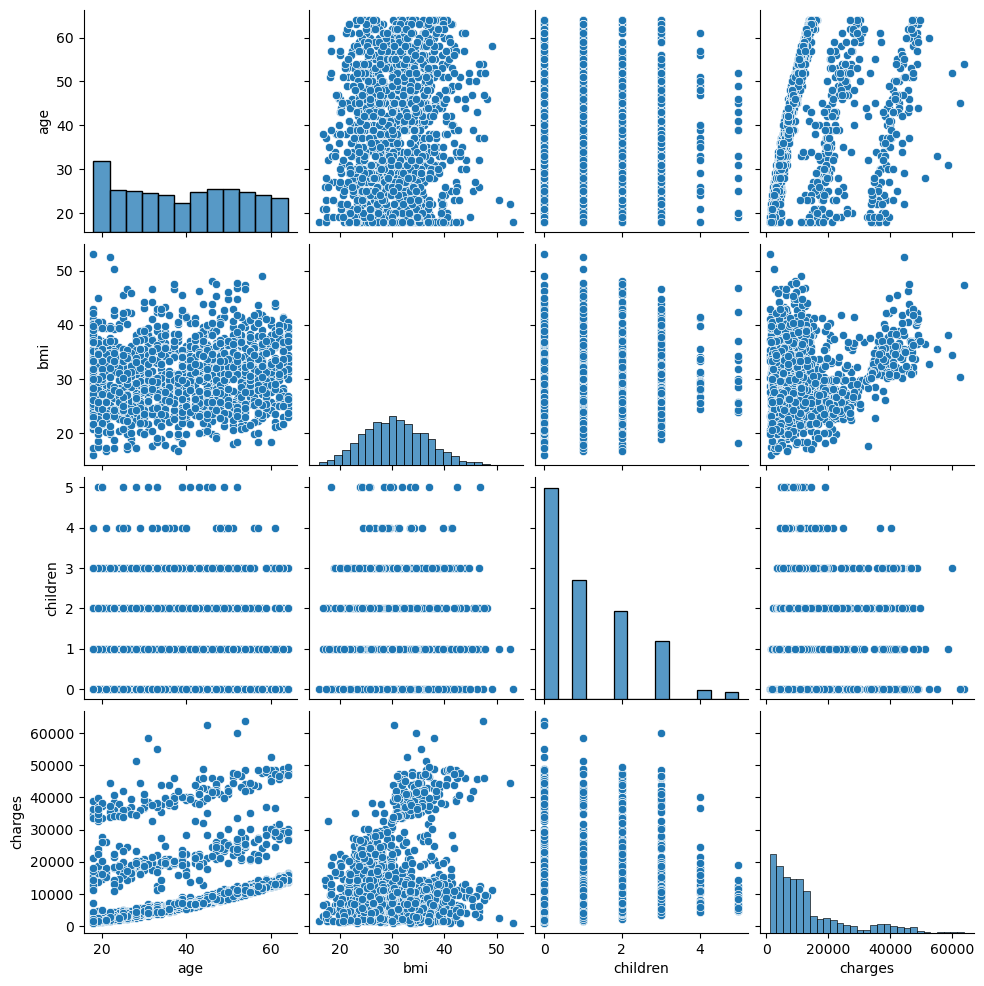

In [39]:
sns.pairplot(df)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

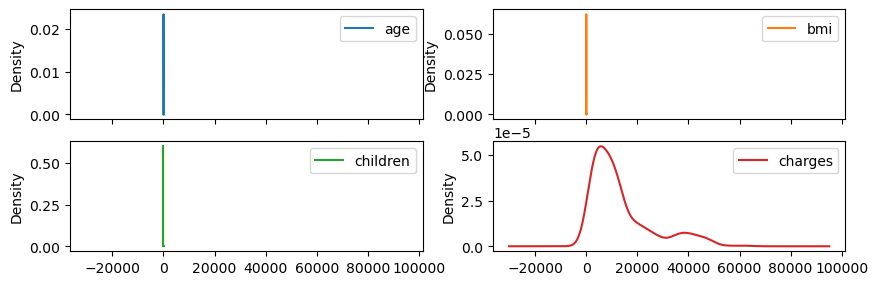

In [40]:
plot = df.plot(kind='kde', subplots=True, layout=(6,2), figsize=(10,10))
plot

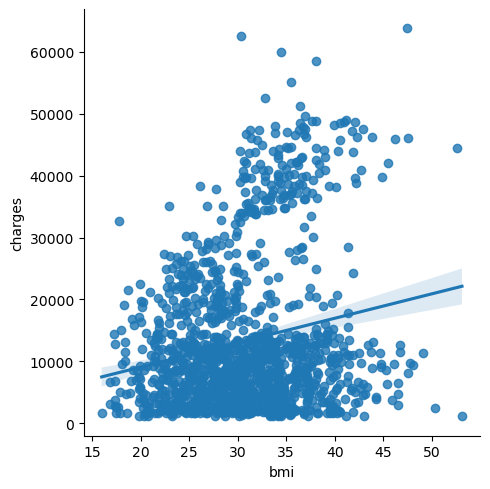

In [41]:
sns.lmplot(x='bmi', y='charges', data =df)

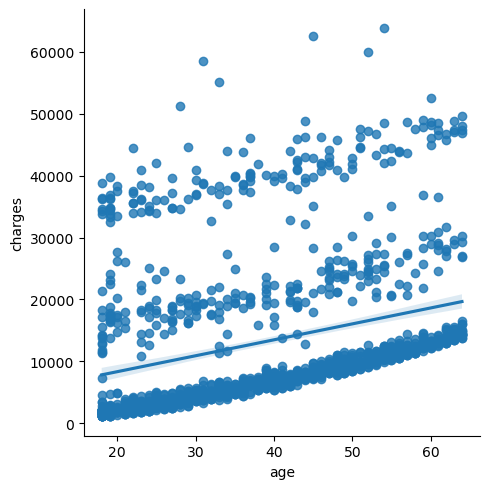

In [42]:
sns.lmplot(x='age', y='charges', data =df)

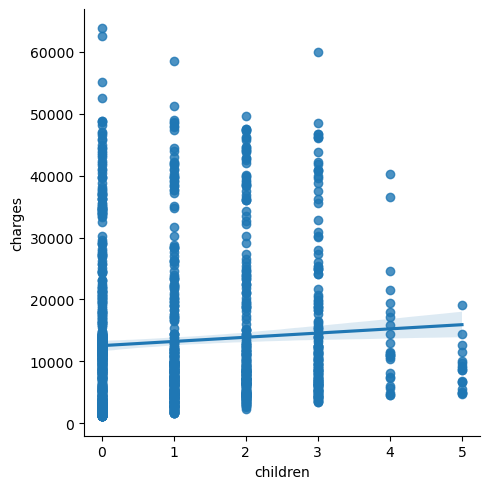

In [43]:
sns.lmplot(x='children', y='charges', data =df)

<Axes: xlabel='charges', ylabel='Density'>

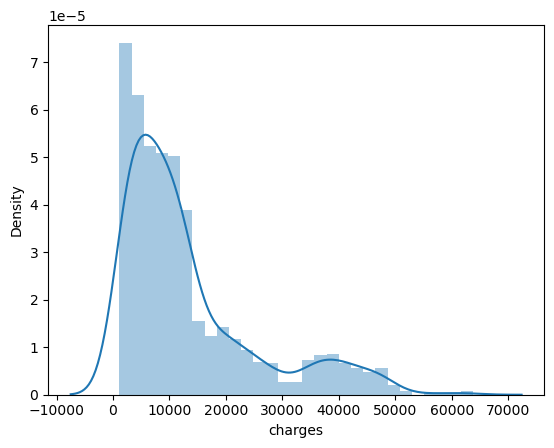

In [44]:
sns.distplot(df['charges'])

<Axes: xlabel='age', ylabel='Density'>

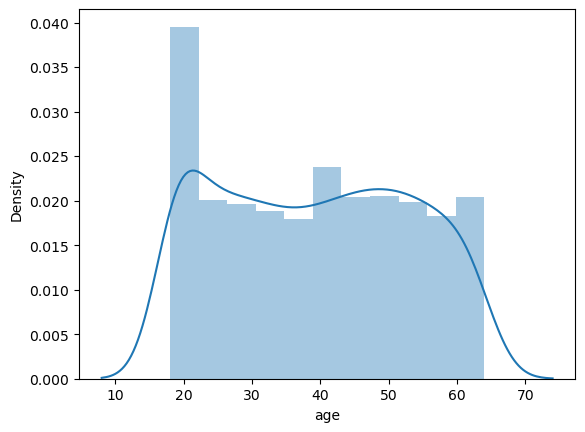

In [45]:
sns.distplot(df['age'])

<Axes: xlabel='bmi', ylabel='Density'>

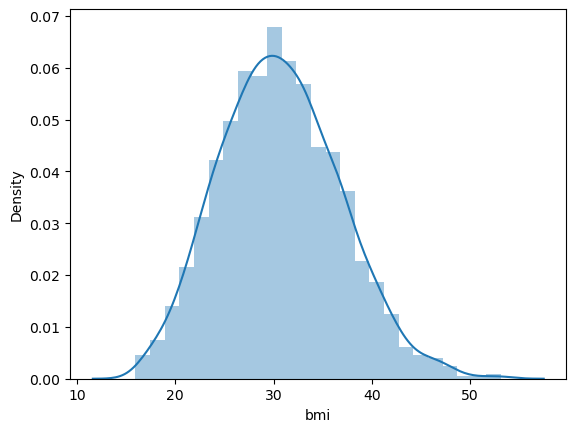

In [46]:
sns.distplot(df['bmi'])

<Axes: xlabel='children', ylabel='Density'>

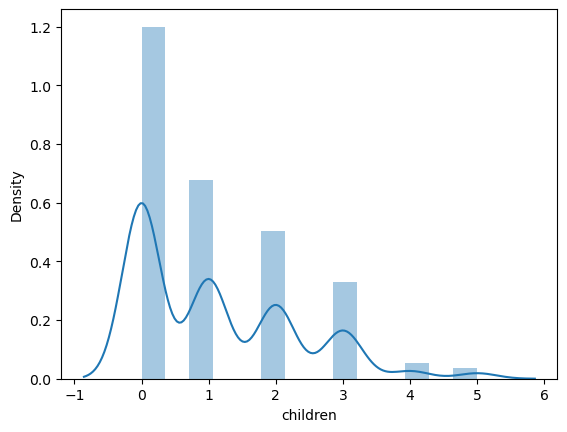

In [47]:
sns.distplot(df['children'])

<Axes: xlabel='region', ylabel='charges'>

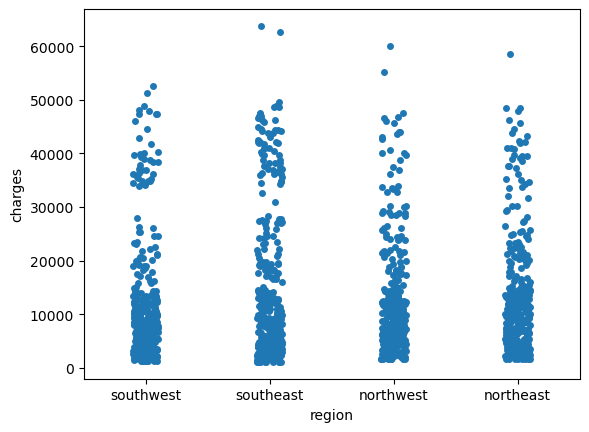

In [48]:
sns.stripplot(x='region', y='charges', data =df)

<Axes: xlabel='sex', ylabel='charges'>

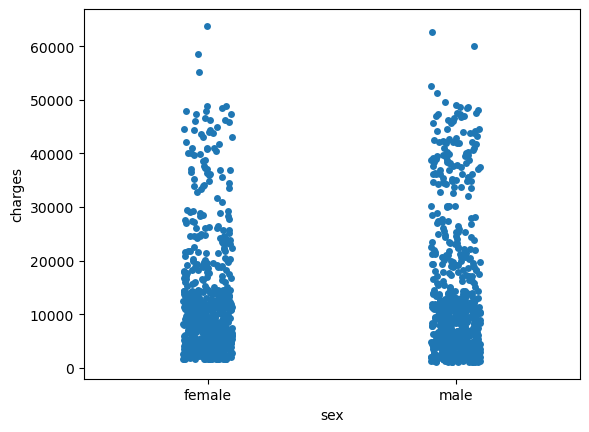

In [49]:
sns.stripplot(x='sex', y='charges', data =df)

<Axes: xlabel='children', ylabel='charges'>

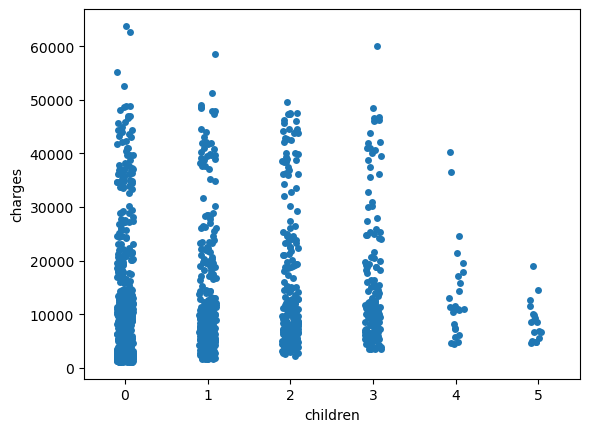

In [50]:
sns.stripplot(x='children', y='charges', data =df)

<Axes: xlabel='smoker', ylabel='charges'>

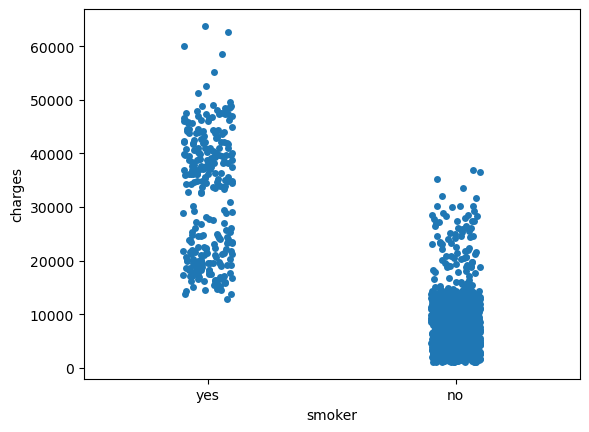

In [51]:
sns.stripplot(x='smoker', y='charges', data =df)

<Axes: xlabel='bmi'>

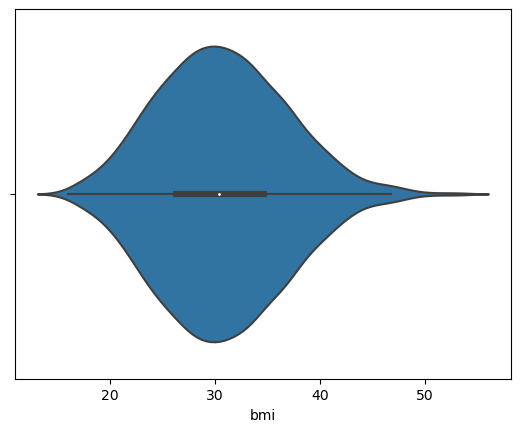

In [52]:
sns.violinplot(x='bmi', data =df)

<Axes: xlabel='charges'>

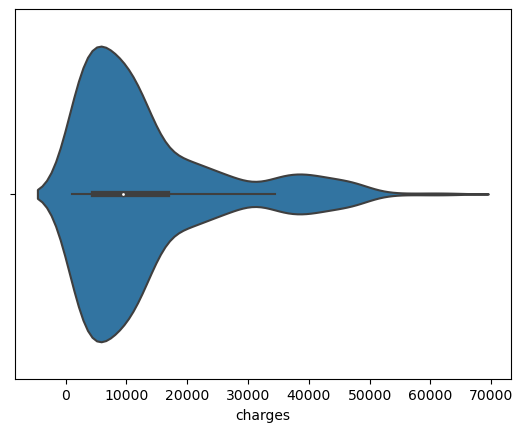

In [53]:
sns.violinplot(x='charges', data =df)

<Axes: xlabel='age'>

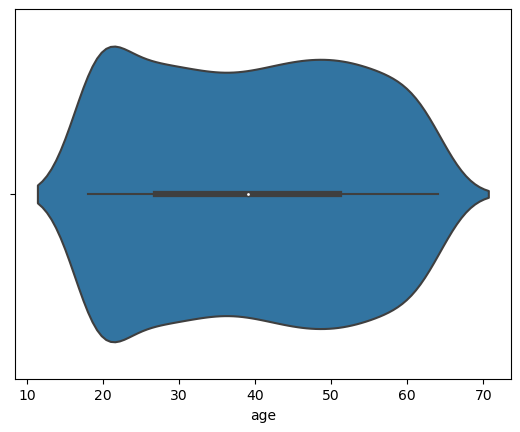

In [54]:
sns.violinplot(x='age', data =df)

<Axes: xlabel='children'>

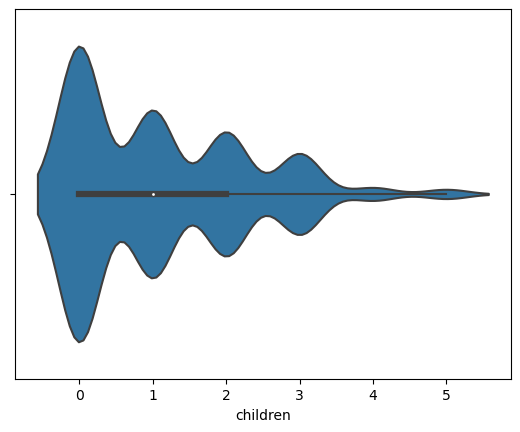

In [55]:
sns.violinplot(x='children', data =df)

From the box plot above we can see that outliers present in bmi and charges

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Encoding categorical column

In [57]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))


In [58]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   float64
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   float64
 5   region    1337 non-null   float64
 6   charges   1337 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 83.6 KB


Here, we have converted the categorical columns to numerical columns using ordinal encoder.

In [60]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [61]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<Axes: >

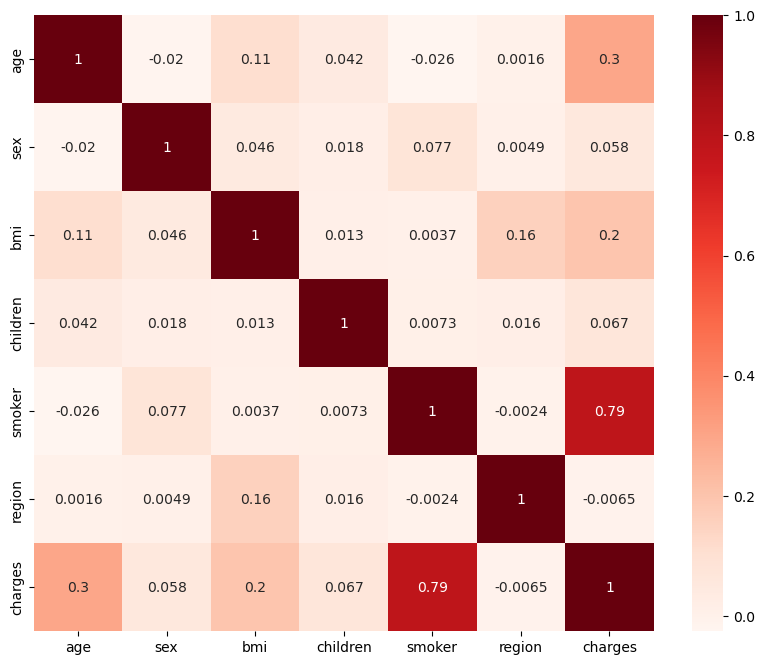

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

Here we can see that, charges  and smoker have high correlation with each other.

# We can see that 'smoker' feature plays a vital role in predicting insurance charges

# Checking for Outliers

age            Axes(0.125,0.712609;0.352273x0.167391)
sex         Axes(0.547727,0.712609;0.352273x0.167391)
bmi            Axes(0.125,0.511739;0.352273x0.167391)
children    Axes(0.547727,0.511739;0.352273x0.167391)
smoker          Axes(0.125,0.31087;0.352273x0.167391)
region       Axes(0.547727,0.31087;0.352273x0.167391)
charges            Axes(0.125,0.11;0.352273x0.167391)
dtype: object

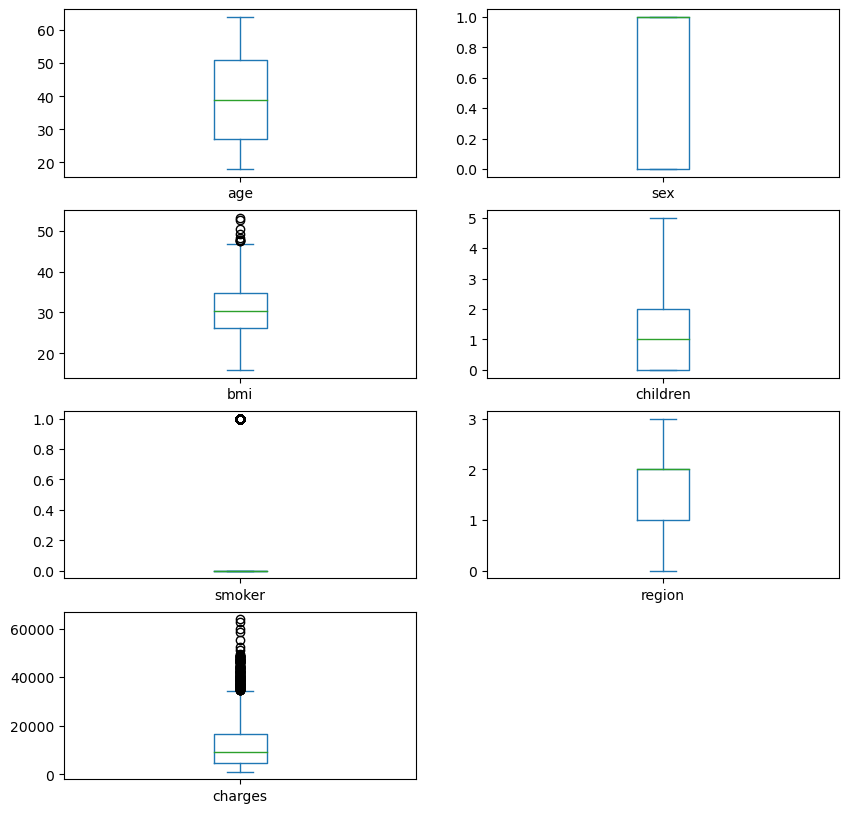

In [63]:
plot = df.plot(kind='box', subplots=True, layout=(4,2), figsize=(10,10))
plot

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.440418,1.009771,0.453160,0.909234,1.969660,1.343163,0.297857
1,1.511647,0.990324,0.509422,0.079442,0.507702,0.438017,0.954381
2,0.799350,0.990324,0.383155,1.580143,0.507702,0.438017,0.729373
3,0.443201,0.990324,1.305052,0.909234,0.507702,0.467128,0.719104
4,0.514431,0.990324,0.292456,0.909234,0.507702,0.467128,0.777499
...,...,...,...,...,...,...,...
1333,0.767704,0.990324,0.050269,1.580143,0.507702,0.467128,0.221263
1334,1.511647,1.009771,0.206053,0.909234,0.507702,1.372274,0.914695
1335,1.511647,1.009771,1.014490,0.909234,0.507702,0.438017,0.962287
1336,1.297958,1.009771,0.797524,0.909234,0.507702,1.343163,0.931054


In [65]:
# threshold =3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
        1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

# Here we can see that outliers are present in 29 rows. We do not want to remove the outliers. Because most of the outliers present in 'children'  and 'bmi' features it critcally affects in predicting insurance cost. 

# Checking skewness

In [66]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

 The columnns smoker, children and charges have skewness in the data, since smoker is a categorical data, no need to remove skewness. For children,we need to remove skewness. Since charges is a target variable, so no changes.

Removing skewness

In [67]:
df['children'] = np.cbrt(df['children'])

In [68]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children   -0.098682
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

Here skewness for children column removed

# Separating Features and Target

In [69]:
x = df.drop("charges", axis = 1)
y= df['charges']

# Feature Scaling using StandardScaler

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440418,-1.009771,-0.453160,-1.118544,1.969660,1.343163
1,-1.511647,0.990324,0.509422,0.501220,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.217560,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-1.118544,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-1.118544,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.217560,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.206053,-1.118544,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.014490,-1.118544,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.797524,-1.118544,-0.507702,1.343163


# Checking for multicollineraity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,1.015854,age
1,1.008882,sex
2,1.040683,bmi
3,1.002998,children
4,1.006636,smoker
5,1.025891,region


By checking VIF values we can see that there is no multicollineraity between columns. Now we can go for model building

# MODEL BUILDING

Finding best random state

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [73]:
x

,age,sex,bmi,children,smoker,region
0,-1.440418,-1.009771,-0.453160,-1.118544,1.969660,1.343163
1,-1.511647,0.990324,0.509422,0.501220,-0.507702,0.438017
2,-0.799350,0.990324,0.383155,1.217560,-0.507702,0.438017
3,-0.443201,0.990324,-1.305052,-1.118544,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292456,-1.118544,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.050269,1.217560,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.206053,-1.118544,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.014490,-1.118544,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.797524,-1.118544,-0.507702,1.343163


In [74]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [75]:
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best r2_score is ", maxAcc, "at random state ", maxRS)

The best r2_score is  0.7996558021172124 at random state  113


Train Test split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Regression Algorithms

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [78]:
#checking accuracy for LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
pred_train_LR = LR.predict(x_train)
print('R2_score : ', r2_score(y_test,predLR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_LR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predLR))
print('Mean Squared Error : ', mean_squared_error(y_test,predLR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predLR)))

R2_score :  79.96558021172125
R2_score on training data :  72.54096853048766
Mean Absolute Error :  3900.0213551065744
Mean Squared Error :  31831539.765309546
Root Mean Squared Error :  5641.9446793911


In [79]:
#checking accuracy for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
pred_train_RFR = RFR.predict(x_train)
print('R2_score : ', r2_score(y_test,predRFR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_RFR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predRFR))
print('Mean Squared Error : ', mean_squared_error(y_test,predRFR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predRFR)))

R2_score :  87.26236279621506
R2_score on training data :  97.29231724058019
Mean Absolute Error :  2571.4169175821908
Mean Squared Error :  20238100.701353077
Root Mean Squared Error :  4498.677661419306


In [80]:
#checking accuracy for ExtraTreesRegressor
ETC = ExtraTreesRegressor()
ETC.fit(x_train,y_train)
predETC = ETC.predict(x_test)
pred_train_ETC = ETC.predict(x_train)
print('R2_score : ', r2_score(y_test,predETC)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_ETC)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predETC))
print('Mean Squared Error : ', mean_squared_error(y_test,predETC))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predETC)))

R2_score :  85.31818765553301
R2_score on training data :  99.86117415453519
Mean Absolute Error :  2673.411824114179
Mean Squared Error :  23327089.00025824
Root Mean Squared Error :  4829.812522268151


In [81]:
#checking accuracy for GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGBR = GBR.predict(x_test)
pred_train_GBR = GBR.predict(x_train)
print('R2_score : ', r2_score(y_test,predGBR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_GBR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predGBR))
print('Mean Squared Error : ', mean_squared_error(y_test,predGBR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predGBR)))

R2_score :  88.62761786287086
R2_score on training data :  89.43315824537429
Mean Absolute Error :  2393.7470910575053
Mean Squared Error :  18068925.282084398
Root Mean Squared Error :  4250.7558483267885


In [82]:
#checking accuracy for AdaBoostRegressor
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
predABR = ABR.predict(x_test)
pred_train_ABR = ABR.predict(x_train)
print('R2_score : ', r2_score(y_test,predABR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_ABR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predABR))
print('Mean Squared Error : ', mean_squared_error(y_test,predABR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predABR)))

R2_score :  84.29235158939726
R2_score on training data :  81.47389797791782
Mean Absolute Error :  3953.9112912769065
Mean Squared Error :  24956981.049889427
Root Mean Squared Error :  4995.696252764917


In [83]:
#checking accuracy for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
pred_train_BR = BR.predict(x_train)
print('R2_score : ', r2_score(y_test,predBR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_BR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predBR))
print('Mean Squared Error : ', mean_squared_error(y_test,predBR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predBR)))

R2_score :  85.65881573709603
R2_score on training data :  96.46445702129137
Mean Absolute Error :  2736.611970295605
Mean Squared Error :  22785884.591144376
Root Mean Squared Error :  4773.456252145229


In [84]:
#checking accuracy for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
pred_train_DTR = DTR.predict(x_train)
print('R2_score : ', r2_score(y_test,predDTR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_DTR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predDTR))
print('Mean Squared Error : ', mean_squared_error(y_test,predDTR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predDTR)))

R2_score :  75.70324008618101
R2_score on training data :  99.86117415453519
Mean Absolute Error :  2907.5045001094527
Mean Squared Error :  38603727.362116635
Root Mean Squared Error :  6213.189789642405


In [85]:
#checking accuracy for KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)
predKNN = KNN.predict(x_test)
pred_train_KNN = KNN.predict(x_train)
print('R2_score : ', r2_score(y_test,predKNN)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_KNN)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predKNN))
print('Mean Squared Error : ', mean_squared_error(y_test,predKNN))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predKNN)))

R2_score :  82.59189810419278
R2_score on training data :  86.03879918503539
Mean Absolute Error :  3319.7605265149255
Mean Squared Error :  27658733.998333327
Root Mean Squared Error :  5259.157156649088


In [86]:
#checking accuracy for Lasso
LA = Lasso()
LA.fit(x_train,y_train)
predLA = LA.predict(x_test)
pred_train_LA = LA.predict(x_train)
print('R2_score : ', r2_score(y_test,predLA)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_LA)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predLA))
print('Mean Squared Error : ', mean_squared_error(y_test,predLA))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predLA)))

R2_score :  79.96324759078597
R2_score on training data :  72.54096399750682
Mean Absolute Error :  3900.0726839232175
Mean Squared Error :  31835245.932837386
Root Mean Squared Error :  5642.273117533162


In [87]:
#checking accuracy for Ridge
RD = Ridge()
RD.fit(x_train,y_train)
predRD = RD.predict(x_test)
pred_train_RD = RD.predict(x_train)
print('R2_score : ', r2_score(y_test,predRD)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_RD)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predRD))
print('Mean Squared Error : ', mean_squared_error(y_test,predRD))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predRD)))

R2_score :  79.95484585161302
R2_score on training data :  72.5408803665759
Mean Absolute Error :  3902.2429093110227
Mean Squared Error :  31848594.97400793
Root Mean Squared Error :  5643.455942417548


# CROSS VALIDATION

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
#checking CV score for LinearRegression

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predLR) - score.mean())*100)

[0.76099747 0.70735964 0.7776184  0.73451938 0.7534895 ]
0.7467968786350555
Difference between R2_score score and CV score is  5.285892348215693


In [90]:
#checking CV score for RandomForestRegressor

score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predRFR) - score.mean())*100)

[0.85304491 0.77680022 0.8705133  0.83176762 0.85550322]
0.8375258548856983
Difference between R2_score score and CV score is  3.5097773076452343


In [91]:
#checking CV score for ExtraTreesRegressor

score = cross_val_score(ETC,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predETC) - score.mean())*100)

[0.83505382 0.7450157  0.85057412 0.8026691  0.84193353]
0.8150492550599034
Difference between R2_score score and CV score is  3.813262149542662


In [92]:
#checking CV score for GradientBoostingRegressor

score = cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predGBR) - score.mean())*100)

[0.87432808 0.80012821 0.89393769 0.85081763 0.86051385]
0.8559450911702013
Difference between R2_score score and CV score is  3.033108745850732


In [93]:
#checking CV score for AdaBoostRegressor

score = cross_val_score(ABR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predABR) - score.mean())*100)

[0.84163114 0.77918688 0.8463644  0.81620643 0.82825724]
0.8223292184364226
Difference between R2_score score and CV score is  2.0594297457549926


In [94]:
#checking CV score for BaggingRegressor

score = cross_val_score(BR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predBR) - score.mean())*100)

[0.83552443 0.76540059 0.85166037 0.82932254 0.84047742]
0.8244770711015914
Difference between R2_score score and CV score is  3.2111086269368982


In [95]:
#checking CV score for DecisionTreeRegressor

score = cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predDTR) - score.mean())*100)

[0.75369986 0.65709994 0.74722613 0.72237295 0.72787566]
0.7216549082389658
Difference between R2_score score and CV score is  3.5377492622844287


In [96]:
#checking CV score for KNeighborsRegressor

score = cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predKNN) - score.mean())*100)

[0.82667617 0.75663744 0.841135   0.79858305 0.81767814]
0.8081419597308412
Difference between R2_score score and CV score is  1.7777021311086605


In [97]:
#checking CV score for Lasso

score = cross_val_score(LA,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predLA) - score.mean())*100)

[0.76100418 0.7073969  0.77759715 0.73451403 0.75349819]
0.7468020908069656
Difference between R2_score score and CV score is  5.28303851008941


In [98]:
#checking CV score for Ridge

score = cross_val_score(RD,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predRD) - score.mean())*100)

[0.76100655 0.70747139 0.77749861 0.73457567 0.75346201]
0.7468028451632853
Difference between R2_score score and CV score is  5.274561335284478


As we can see that GradientBoostingRegressor has the highest R2_score and cross_val_score and the diff bet r2 score and cv also very less

# GradientBoostingRegressor is our best model

# Hyper Parameter Tuning

In [99]:
#Using Grid Search CV on Gradient Boosting Regressor

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['friedman_mse', 'squared_error'],
              'n_estimators' : [50, 100, 200, 300],
              'random_state' : [0, 10, 50, 1000],
              'max_depth' : [0, 1, 2, 3, 5, 10]}


In [100]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv = 5 )

In [101]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [0, 1, 2, 3, 5, 10],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [0, 10, 50, 1000]})

In [102]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'friedman_mse', 'max_depth': 3, 'n_estimators': 50, 'random_state': 1000}


Building Final model using best parameters.

In [103]:
Final_model= GradientBoostingRegressor(criterion = 'friedman_mse', max_depth = 3, n_estimators = 50, random_state = 1000)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score : ', r2_score(y_test,pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
print('Mean Squared Error : ', mean_squared_error(y_test,pred))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred)))

R2_score :  0.8911708799938348
Mean Absolute Error :  2326.8631147189176
Mean Squared Error :  17291234.274359368
Root Mean Squared Error :  4158.272991803132


# The R2_score for our best model is 89.1%

# Saving the Best model

In [104]:
import joblib
joblib.dump(Final_model, "Medical_Cost_Insurance_Prediction.pkl")

['Medical_Cost_Insurance_Prediction.pkl']

# Loading and Prediction

In [105]:
load_model= joblib.load("Medical_Cost_Insurance_Prediction.pkl")

In [106]:
prediction=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [107]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
Predicted,6917.152267,6477.369713,5966.160385,4339.153609,4394.310127,3882.129943,10115.964928,9845.41765,6648.760333,15495.199832,...,14573.599536,39266.704579,9383.385582,7347.957477,13260.954278,47968.634149,13688.220929,7825.94599,4928.533229,6770.045285
Original,4949.758700,4296.271200,4518.826250,2498.414400,3238.435700,2205.980800,9182.170000,8125.78450,5124.188700,14590.632050,...,13770.097900,40003.332250,7345.084000,6358.776450,33471.971890,45863.205000,10797.336200,7045.49900,3736.464700,4670.640000
